## Limpieza de datos

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
archivo = 'default of credit card clients.xls'
# Leer el archivo sin encabezados
df = pd.read_excel(archivo, header=None)

# Fusionar las dos primeras filas para crear el encabezado
new_header = df.iloc[0:2].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0)

# Establecer el nuevo encabezado y eliminar las filas utilizadas para el encabezado
df = df[2:]  # Descarta las filas usadas para el encabezado
df.columns = new_header  # Establece el nuevo encabezado
#df = df.head(500)


In [3]:
# Se elimina las filas que contengan un -2 entre las columnas X6 a X11
valor_especifico=-2

for i in range(6,12):
    df = df.drop(df.loc[df.iloc[:, i] == valor_especifico].index)
    df.iloc[:, i].replace(-1, 0, inplace=True)

df


C:\Users\Fercho\AppData\Local\Temp\ipykernel_31464\312741950.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, i].replace(-1, 0, inplace=True)
C:\Users\Fercho\AppData\Local\Temp\ipykernel_31464\312741950.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, i].replace(-1, 0, in

,ID,X1 LIMIT_BAL,X2 SEX,X3 EDUCATION,X4 MARRIAGE,X5 AGE,X6 PAY_0,X7 PAY_2,X8 PAY_3,X9 PAY_4,...,X15 BILL_AMT4,X16 BILL_AMT5,X17 BILL_AMT6,X18 PAY_AMT1,X19 PAY_AMT2,X20 PAY_AMT3,X21 PAY_AMT4,X22 PAY_AMT5,X23 PAY_AMT6,Y default payment next month
3,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
5,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
7,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29998,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29999,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
30000,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
filas=len(df)
for index, row in df.iterrows():
    numero_ceros = df['Y default payment next month'].value_counts()[0]
    numero_unos = df['Y default payment next month'].value_counts()[1]
    porc_ceros=numero_ceros/filas
    porc_unos=numero_unos/filas
    error=abs(porc_ceros-porc_unos)
    if error<0.00001:
        break
    elif row['Y default payment next month']==0:
        df.drop(index, inplace=True)
    filas=len(df)
        



## Exploración de Datos

In [5]:
for i in range(12, 18):
    df[f'RatioUso_{i}'] = df[f"X{i} BILL_AMT{i-11}"] / df["X1 LIMIT_BAL"] 
df

,ID,X1 LIMIT_BAL,X2 SEX,X3 EDUCATION,X4 MARRIAGE,X5 AGE,X6 PAY_0,X7 PAY_2,X8 PAY_3,X9 PAY_4,...,X21 PAY_AMT4,X22 PAY_AMT5,X23 PAY_AMT6,Y default payment next month,RatioUso_12,RatioUso_13,RatioUso_14,RatioUso_15,RatioUso_16,RatioUso_17
3,2,120000,2,2,2,26,0,2,0,0,...,1000,0,2000,1,0.02235,0.014375,0.02235,0.027267,0.028792,0.027175
15,14,70000,1,2,2,30,1,2,2,0,...,3000,1500,0,1,0.940029,0.962414,0.938586,0.954029,0.516243,0.527057
18,17,20000,1,1,2,24,0,0,2,2,...,0,1650,0,1,0.7688,0.9005,0.8714,0.9169,0.89525,0.9552
23,22,120000,2,2,1,39,0,0,0,0,...,632,316,0,1,0.002633,0.002633,0.002633,0.0,0.005267,0.002633
24,23,70000,2,2,2,26,2,0,0,2,...,3601,0,1820,1,0.586957,0.606357,0.643143,0.628657,0.670071,0.657314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636
29998,29997,150000,1,3,2,43,0,0,0,0,...,129,0,0,0,0.01122,0.012187,0.023347,0.05986,0.0346,0.0
29999,29998,30000,1,2,2,37,4,3,2,0,...,4200,2000,3100,1,0.118833,0.111867,0.091933,0.695933,0.686067,0.645233
30000,29999,80000,1,3,1,41,1,0,0,0,...,1926,52964,1804,1,-0.020563,0.979738,0.9538,0.659675,0.148187,0.6118


<Axes: >

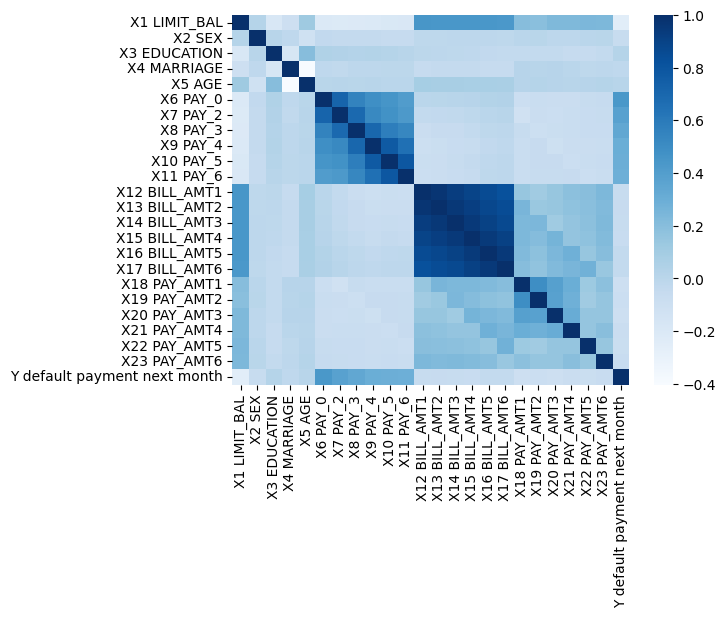

In [6]:
features=["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6", "X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6", "Y default payment next month"]
data_filtered=df[features]
corr = data_filtered.corr()
sns.heatmap(corr, cmap="Blues", annot=False)

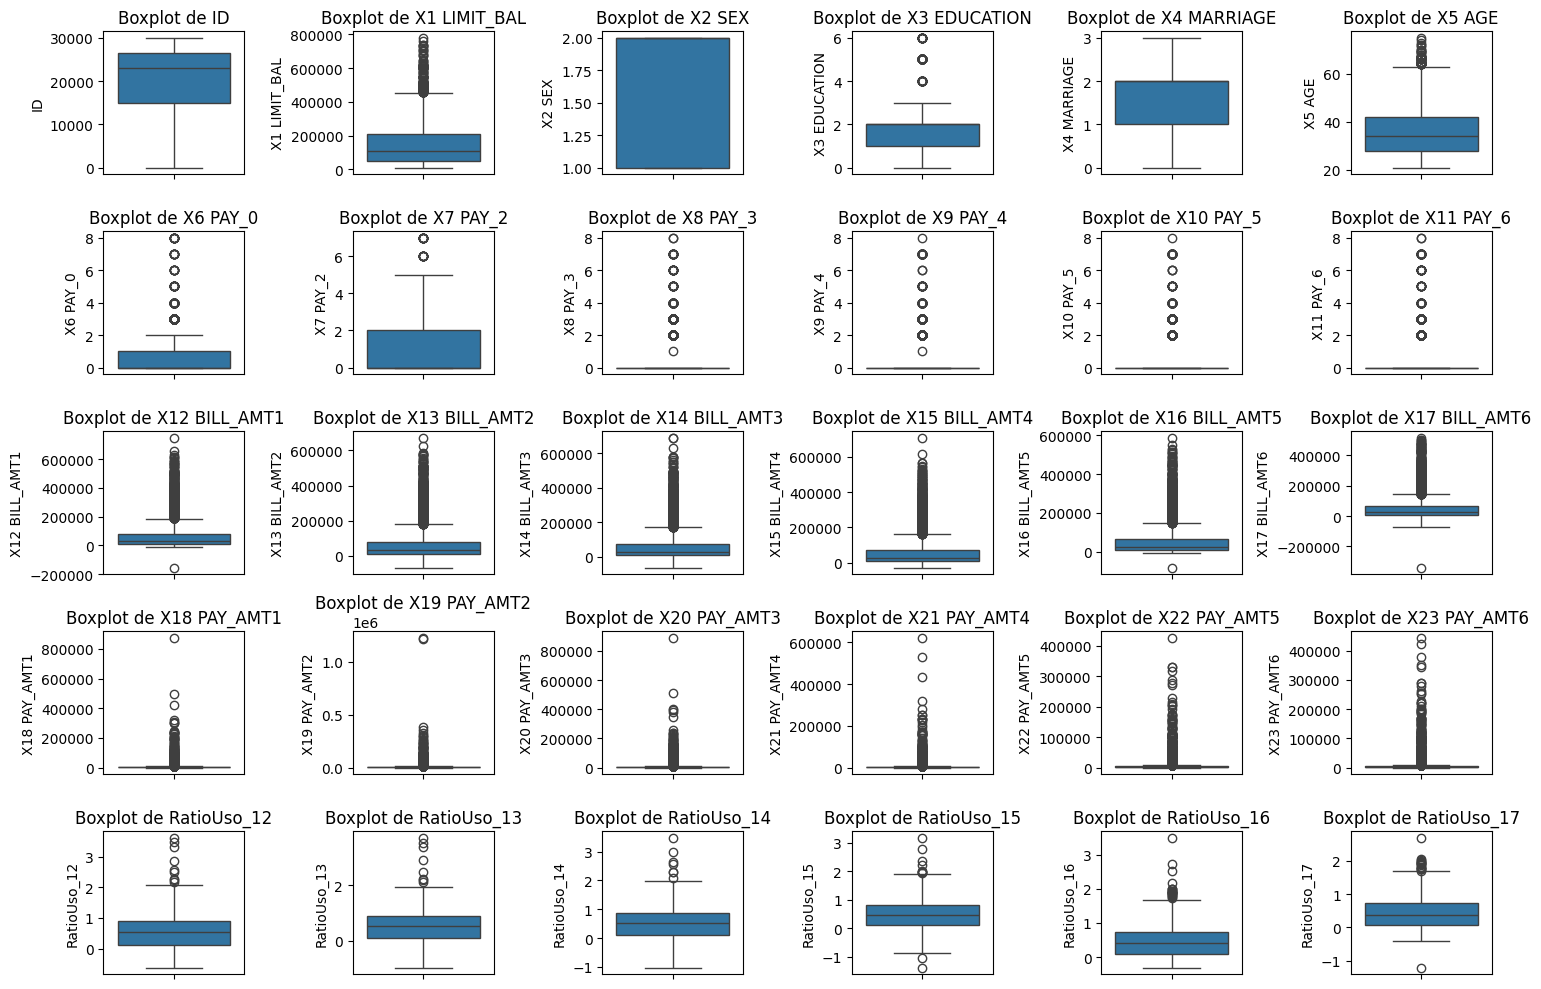

In [7]:
import matplotlib.pyplot as plt

# Definir las variables de entrada (todas except la variable objetivo)
variables_entrada = df.drop(columns=["Y default payment next month"])

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Crear un boxplot para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=columna, data=df)
    plt.title(f'Boxplot de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los boxplots
plt.show()

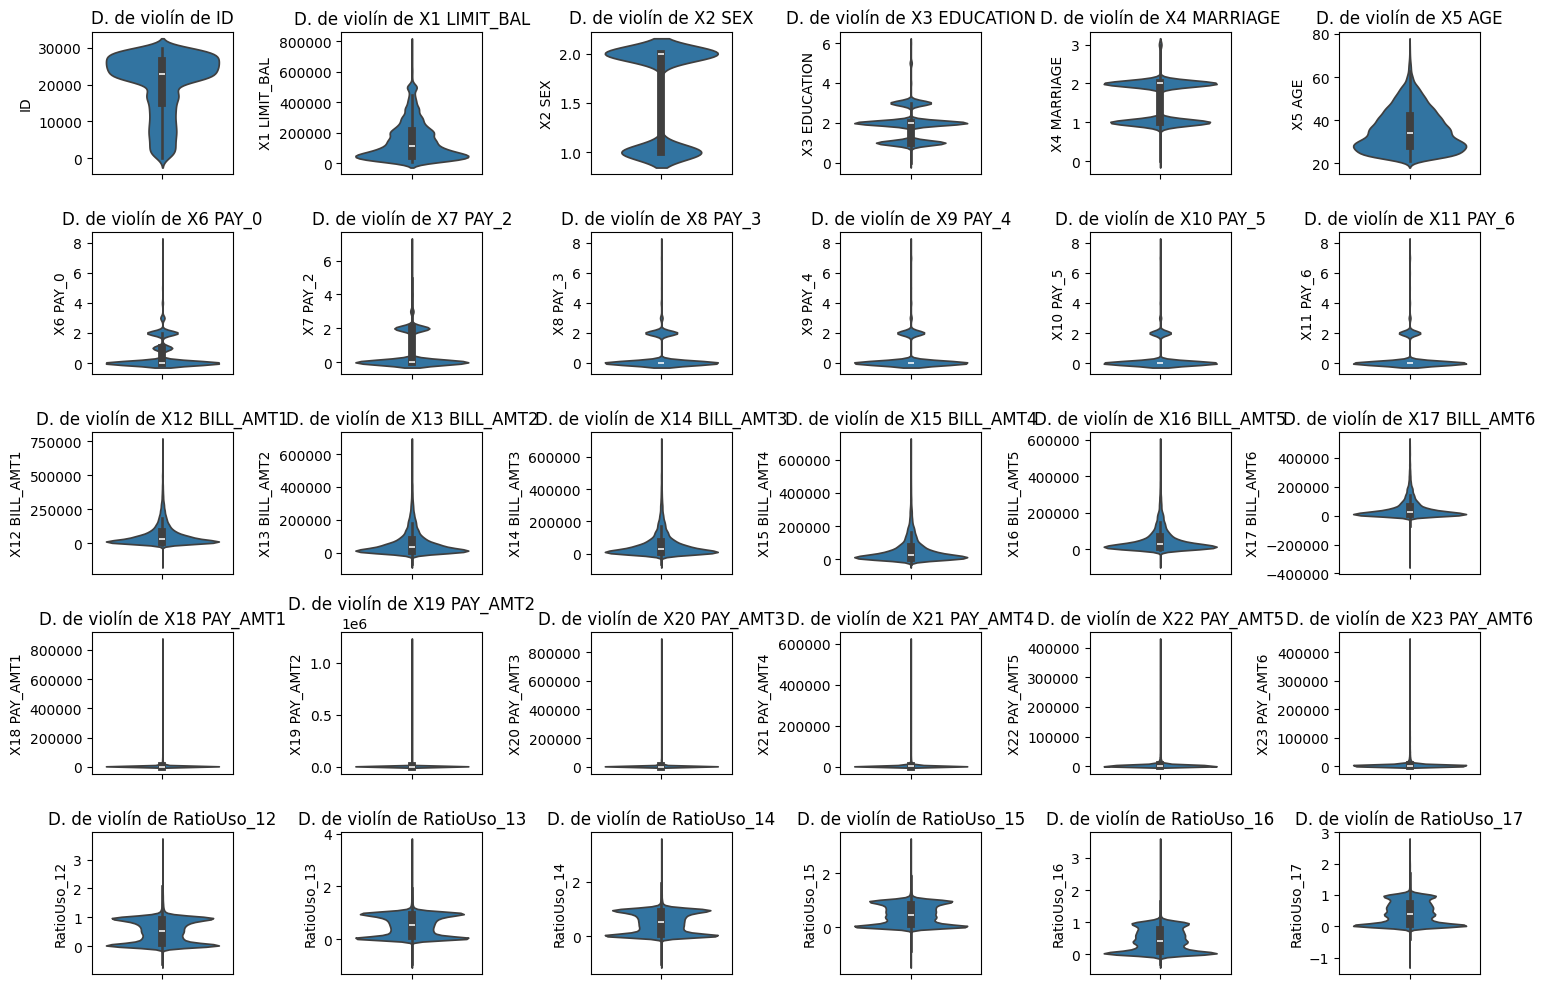

In [8]:
plt.figure(figsize=(15, 10))

# Crear un diagrama de violín para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    plt.subplot(5, 6, i+1)
    sns.violinplot(y=columna, data=df)
    plt.title(f'D. de violín de {columna}')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los diagramas de violín
plt.show()

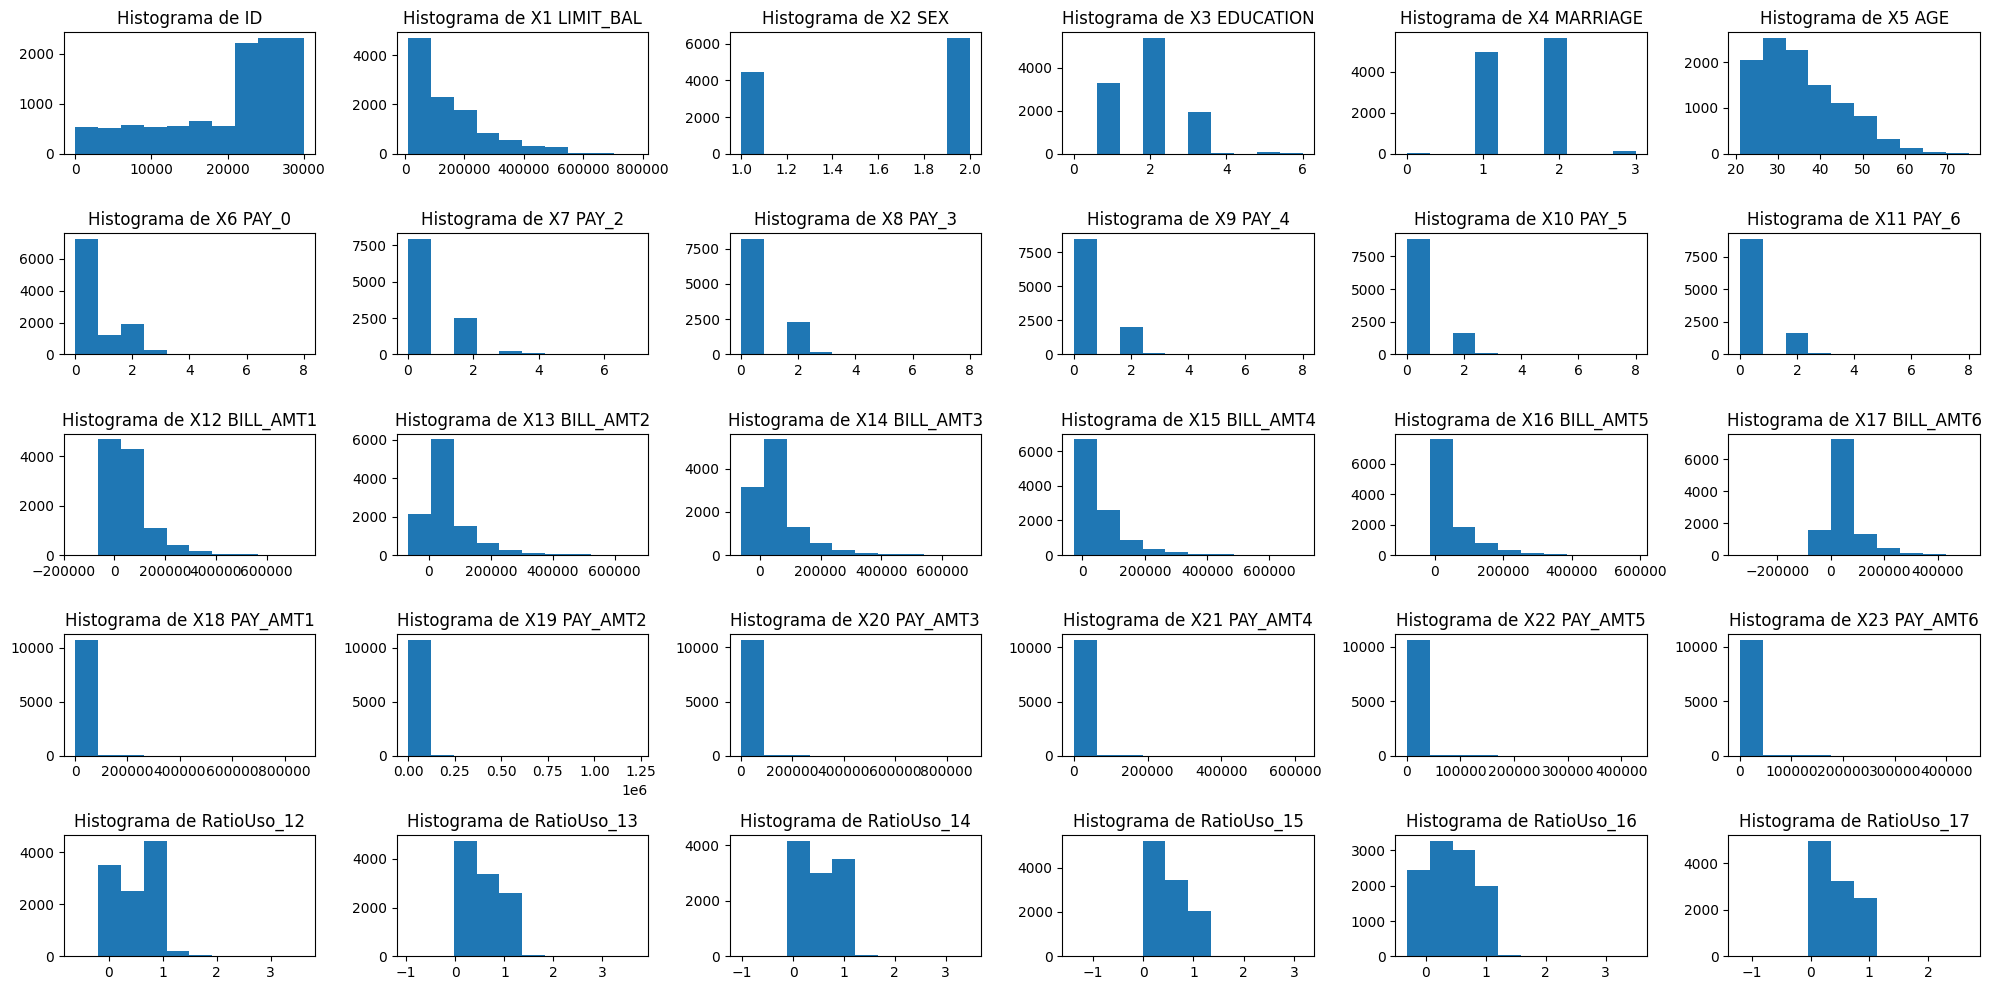

In [9]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Crear un histograma para cada variable de entrada
num_subplots = min(len(variables_entrada.columns), 30)
for i, columna in enumerate(variables_entrada.columns[:num_subplots]):
    ax = plt.subplot(5, 6, i+1)
    df[columna].hist(ax=ax)
    ax.set_title(f'Histograma de {columna}')
    ax.grid(False)  # Eliminar grid


# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los histogramas
plt.show()

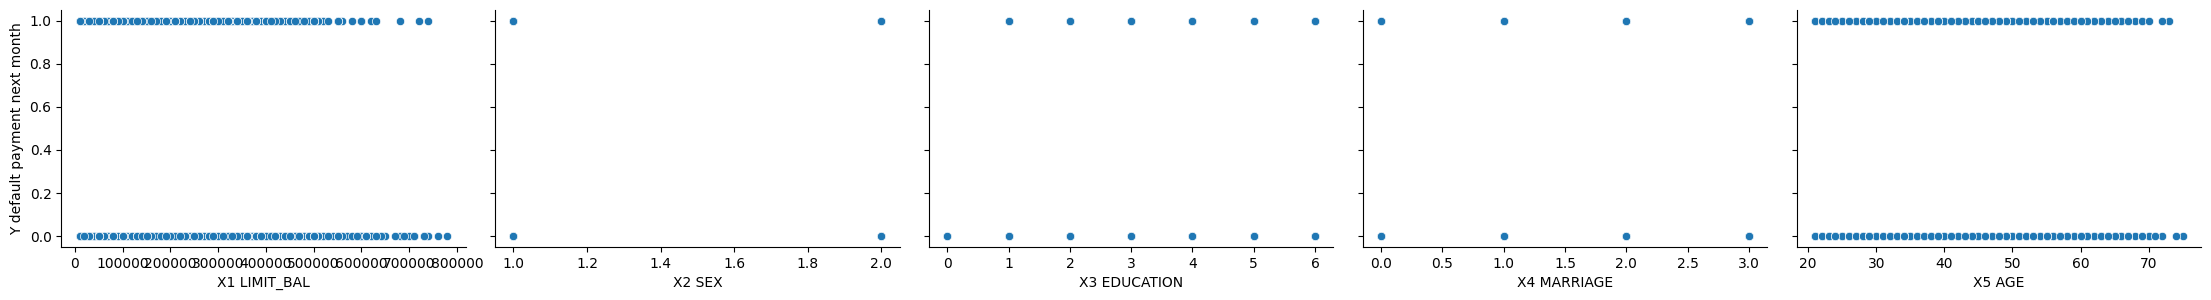

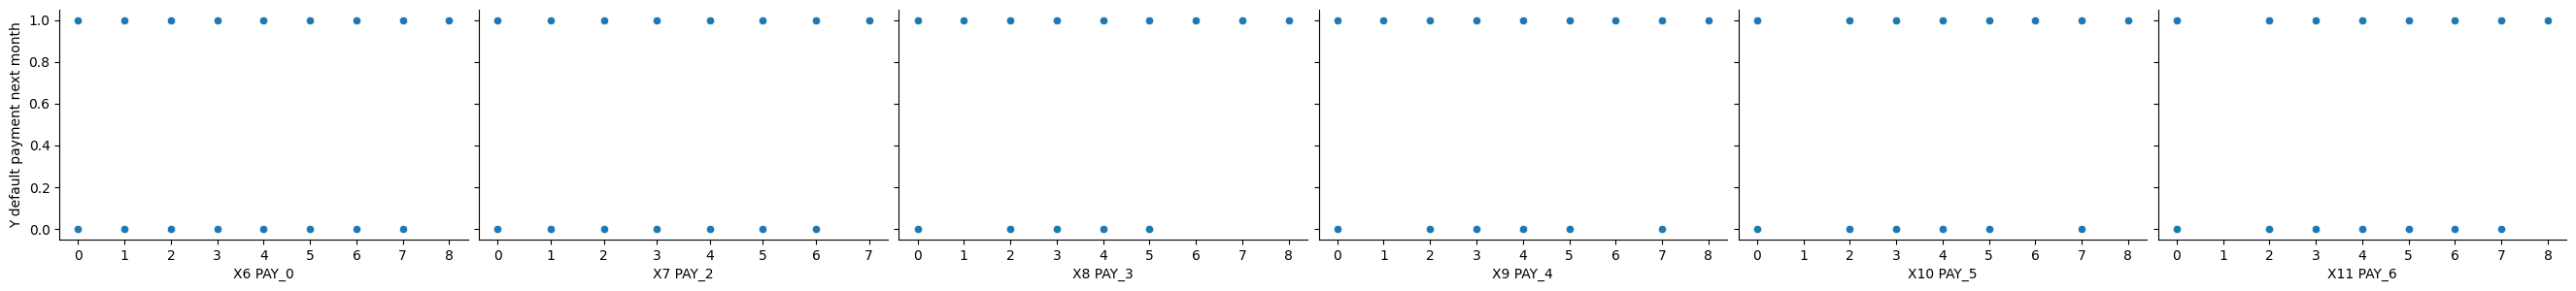

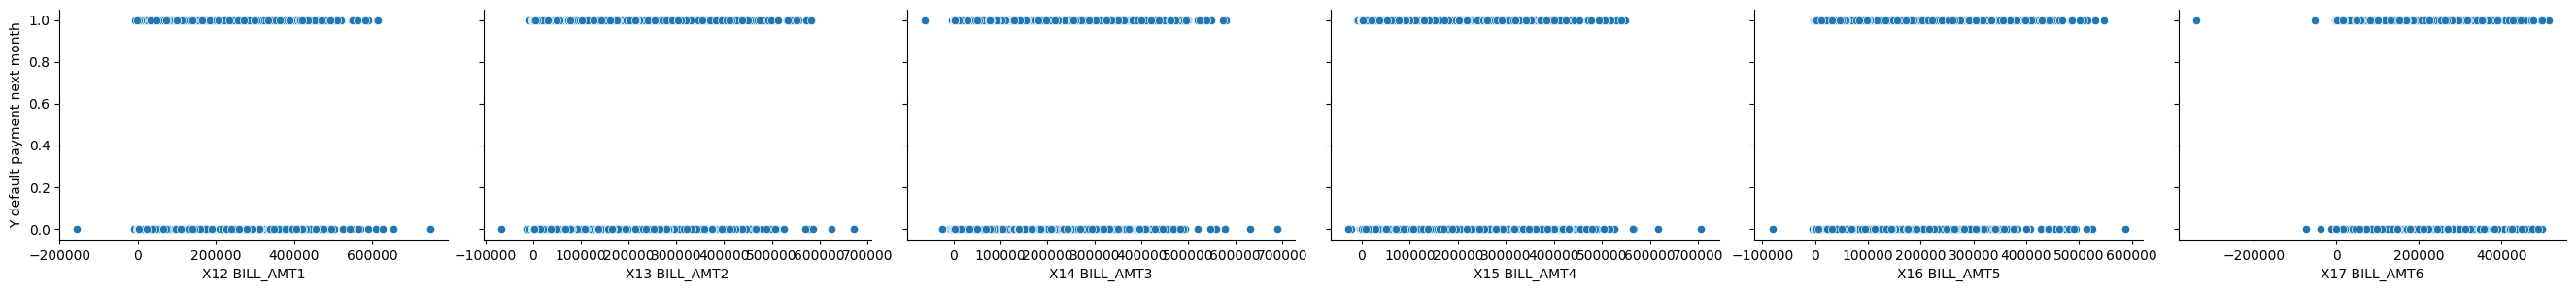

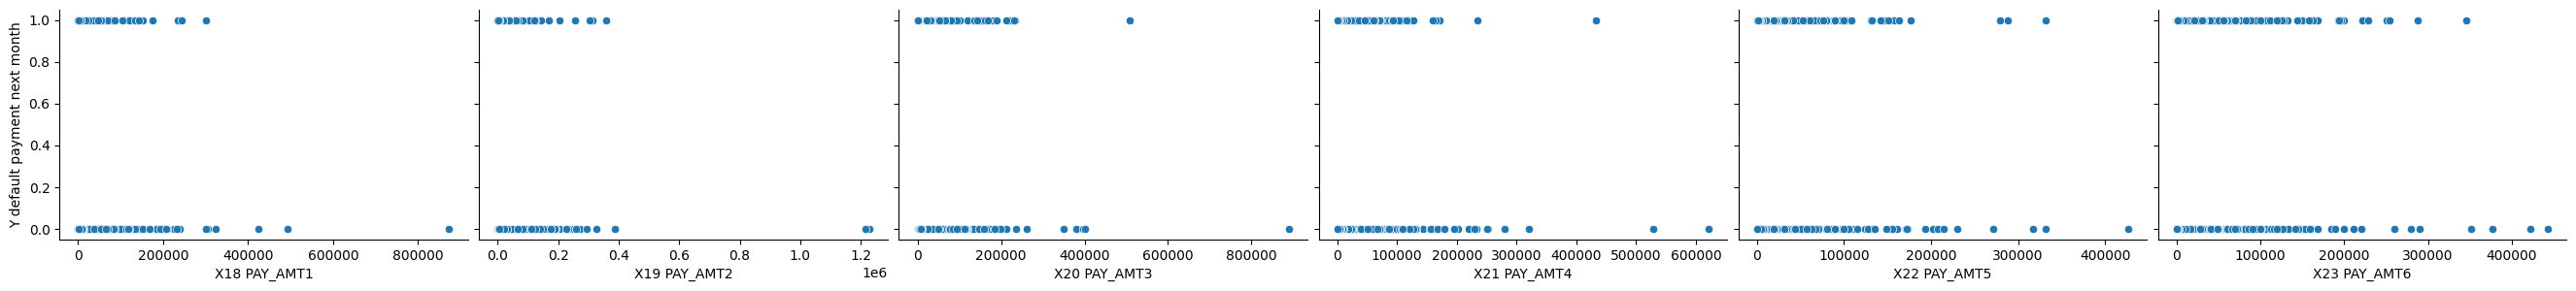

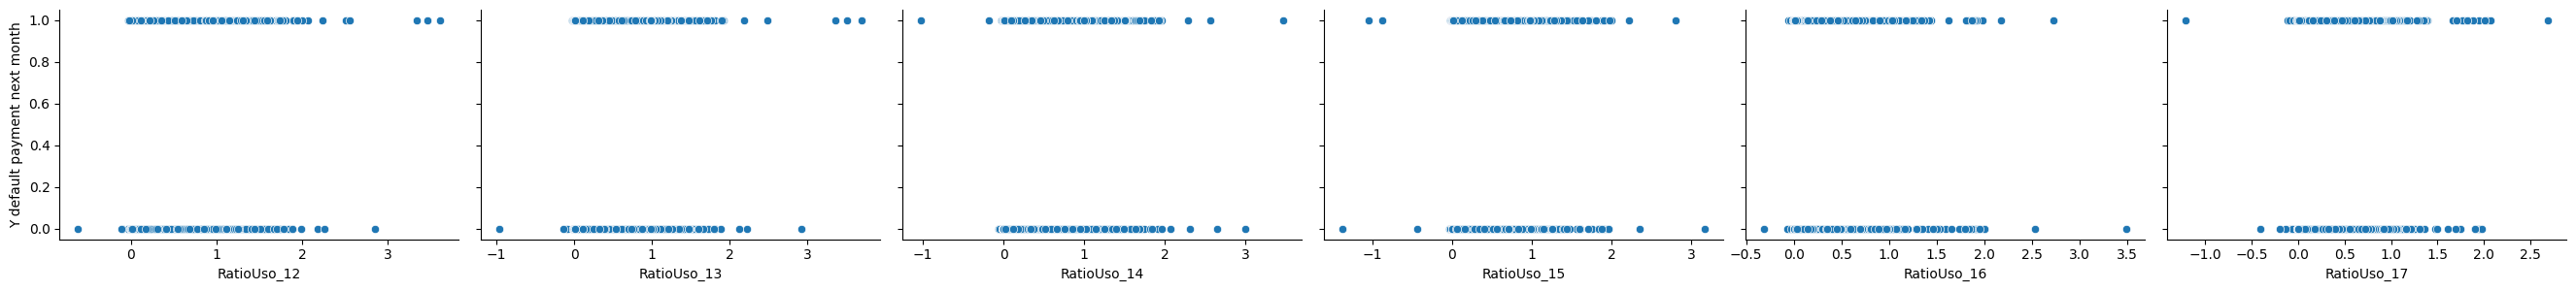

In [10]:
equis = ["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6", "X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6", "Y default payment next month"]
sns.pairplot(df, x_vars=["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["X18 PAY_AMT1", "X19 PAY_AMT2", "X20 PAY_AMT3", "X21 PAY_AMT4", "X22 PAY_AMT5", "X23 PAY_AMT6"], y_vars="Y default payment next month", height=3, aspect=1.5)
sns.pairplot(df, x_vars=["RatioUso_12", "RatioUso_13", "RatioUso_14", "RatioUso_15", "RatioUso_16", "RatioUso_17"], y_vars="Y default payment next month", height=3, aspect=1.5)


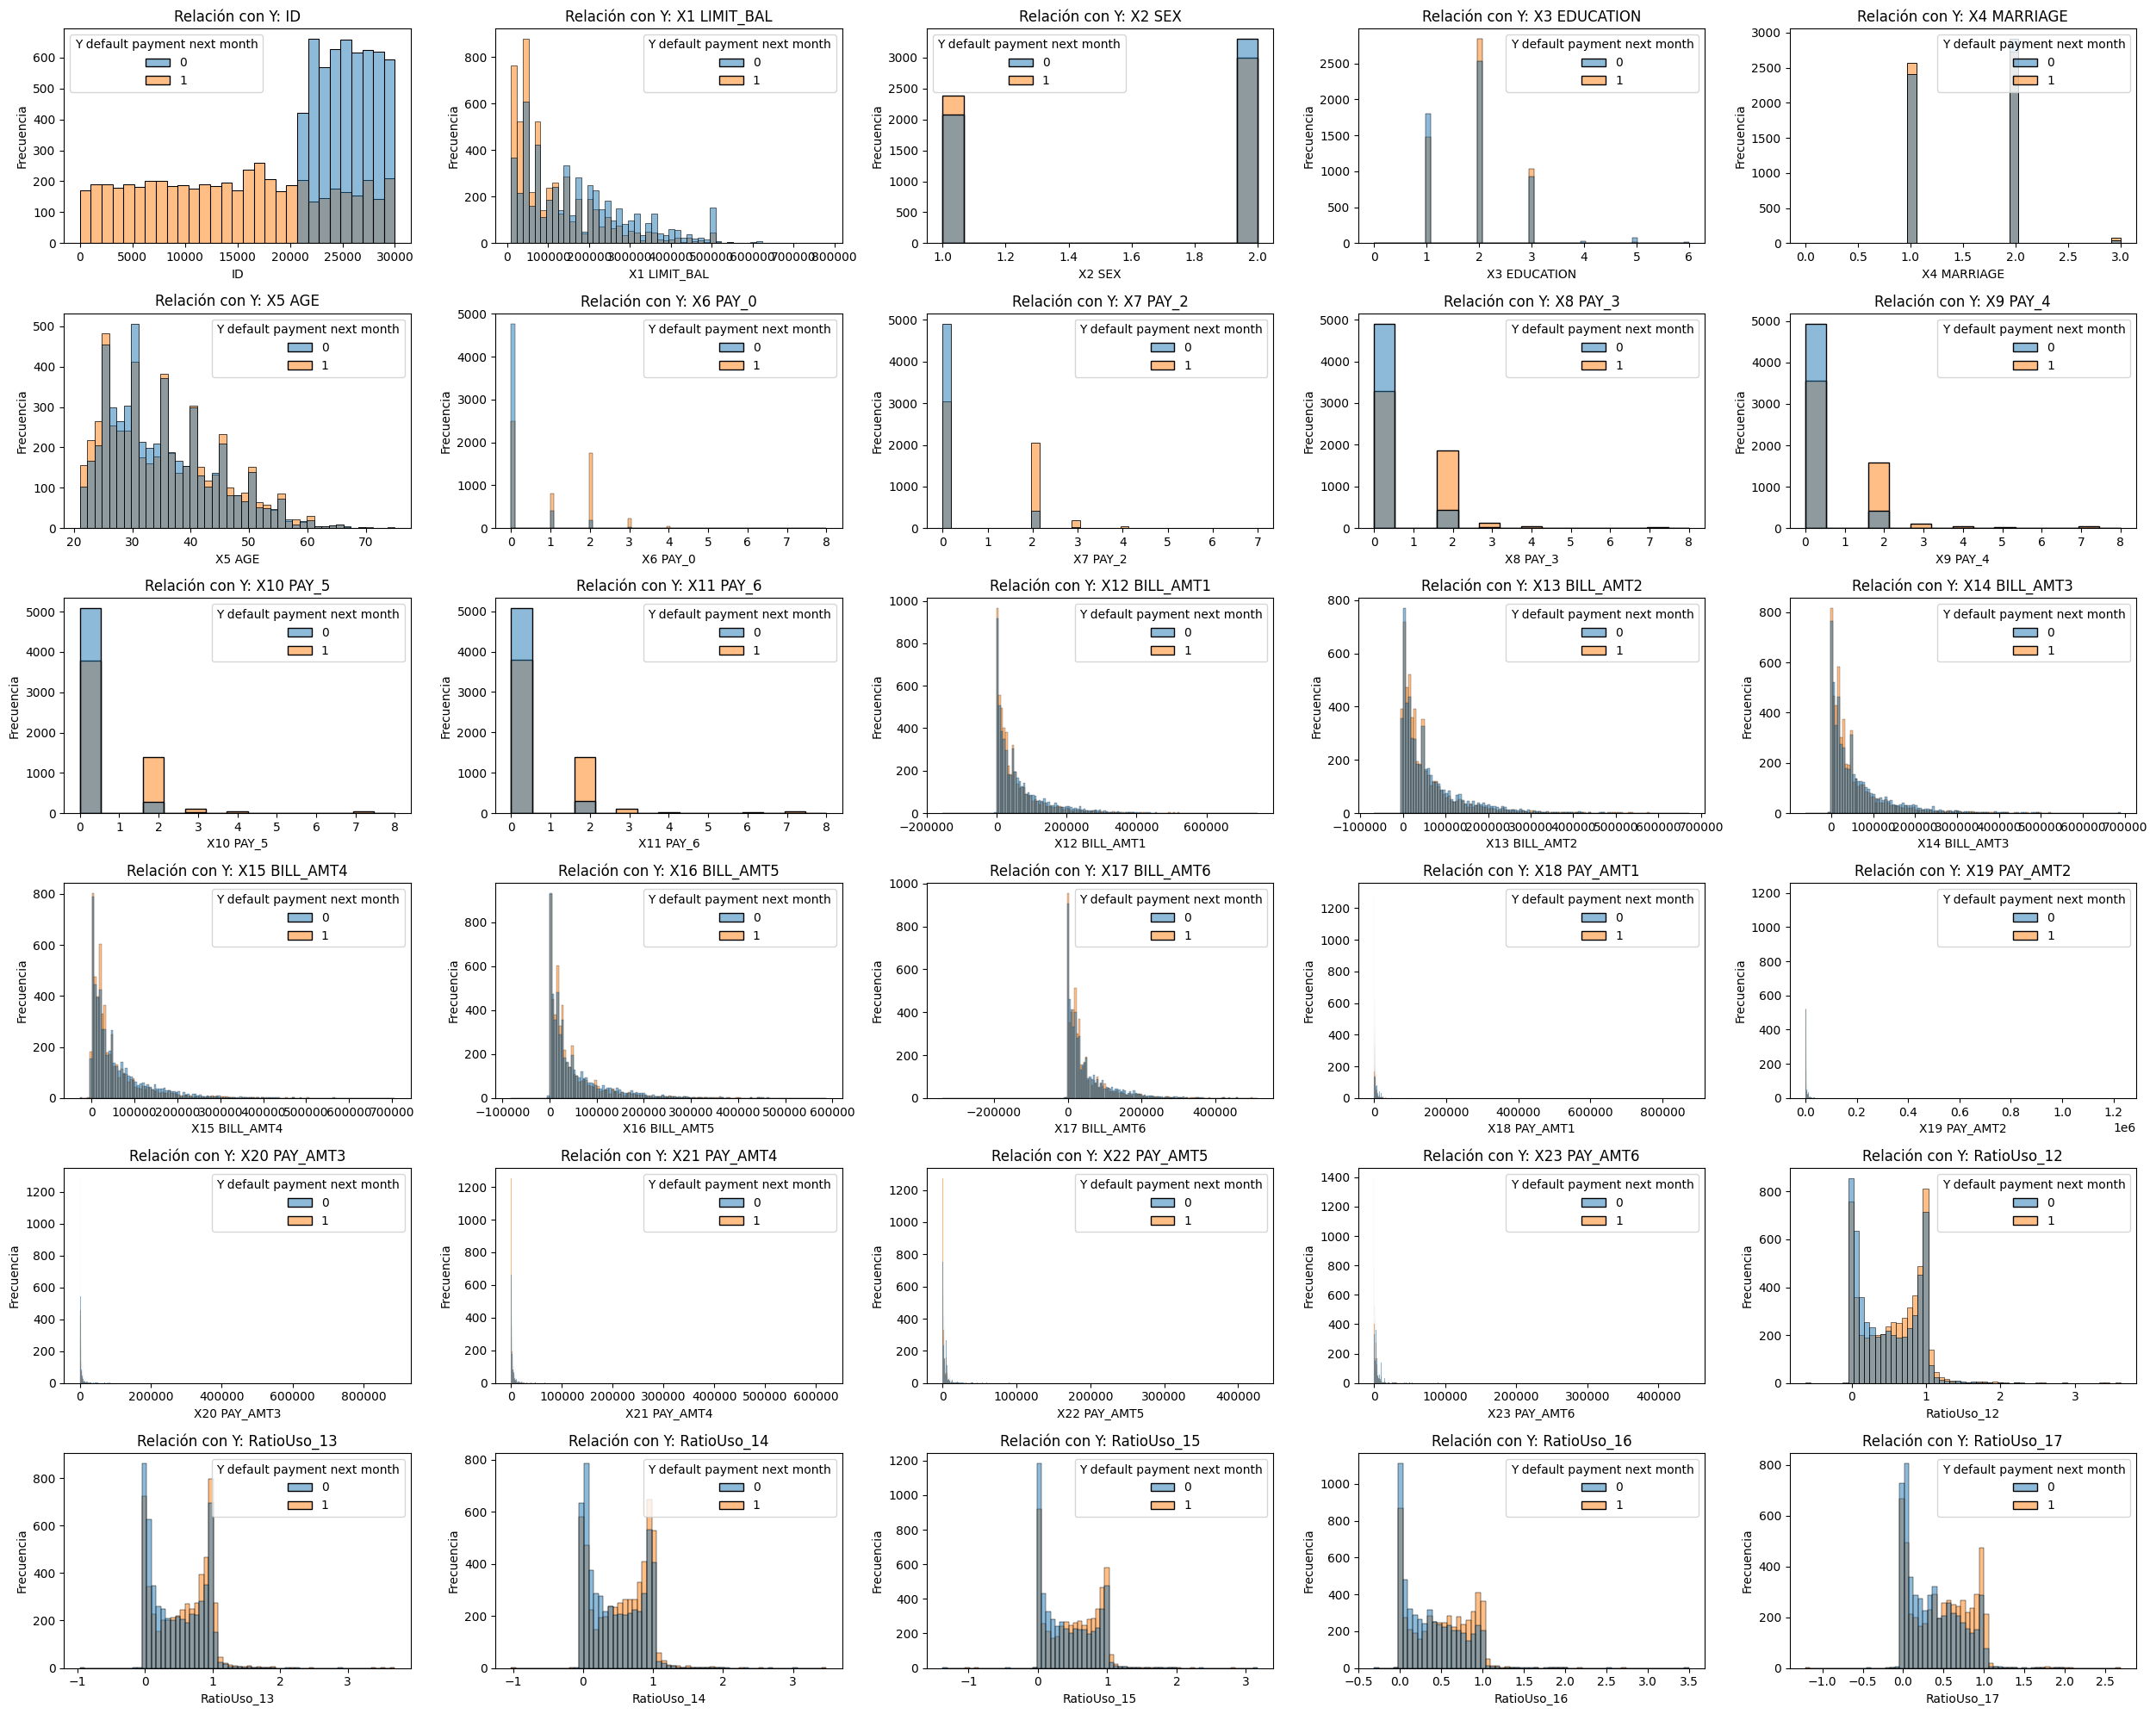

In [11]:
# Definir las variables de entrada (todas except la variable objetivo)
# variables_entrada2 = ["X1 LIMIT_BAL", "X2 SEX", "X3 EDUCATION", "X4 MARRIAGE", "X5 AGE", "X6 PAY_0", "X7 PAY_2", "X8 PAY_3", "X9 PAY_4", "X10 PAY_5", "X11 PAY_6", "X12 BILL_AMT1", "X13 BILL_AMT2", "X14 BILL_AMT3", "X15 BILL_AMT4", "X16 BILL_AMT5", "X17 BILL_AMT6"] # df.drop(columns=["Y default payment next month"])

# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Crear una gráfica por cada variable de entrada
for i, columna in enumerate(variables_entrada):
    plt.subplot(6, 5, i+1)
    #if df[columna].dtype == 'O':
    # sns.countplot(x=columna, hue="Y default payment next month", data=df)
    #else:
    sns.histplot(x=columna, hue="Y default payment next month", data=df)
    plt.title(f'Relación con Y: {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()

## Modelamiento

Librerías

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Variables

In [13]:
# Variable de respuesta (última columna)
y = df['Y default payment next month']

# Variables de entrada (solo las columnas especificadas)
columnas_X = ['X1 LIMIT_BAL', 'X2 SEX', 'X3 EDUCATION', 'X6 PAY_0', 'X7 PAY_2', 
              'X8 PAY_3', 'X9 PAY_4', 'X10 PAY_5', 'X11 PAY_6', 'RatioUso_12', 
              'RatioUso_13', 'RatioUso_14', 'RatioUso_15', 'RatioUso_16', 'RatioUso_17']

X = df[columnas_X]

X

,X1 LIMIT_BAL,X2 SEX,X3 EDUCATION,X6 PAY_0,X7 PAY_2,X8 PAY_3,X9 PAY_4,X10 PAY_5,X11 PAY_6,RatioUso_12,RatioUso_13,RatioUso_14,RatioUso_15,RatioUso_16,RatioUso_17
3,120000,2,2,0,2,0,0,0,2,0.02235,0.014375,0.02235,0.027267,0.028792,0.027175
15,70000,1,2,1,2,2,0,0,2,0.940029,0.962414,0.938586,0.954029,0.516243,0.527057
18,20000,1,1,0,0,2,2,2,2,0.7688,0.9005,0.8714,0.9169,0.89525,0.9552
23,120000,2,2,0,0,0,0,0,0,0.002633,0.002633,0.002633,0.0,0.005267,0.002633
24,70000,2,2,2,0,0,2,2,2,0.586957,0.606357,0.643143,0.628657,0.670071,0.657314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,220000,1,3,0,0,0,0,0,0,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636
29998,150000,1,3,0,0,0,0,0,0,0.01122,0.012187,0.023347,0.05986,0.0346,0.0
29999,30000,1,2,4,3,2,0,0,0,0.118833,0.111867,0.091933,0.695933,0.686067,0.645233
30000,80000,1,3,1,0,0,0,0,0,-0.020563,0.979738,0.9538,0.659675,0.148187,0.6118


Separación Datos

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Datos

In [15]:
# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir y_train y y_test a números enteros
y_train = pd.to_numeric(y_train, errors='coerce').astype(int)
y_test = pd.to_numeric(y_test, errors='coerce').astype(int)


In [16]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

float64
float64
int32
int32


Más librerías

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Función del modelo

In [18]:
def build_model(activacion, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

Iteración sobre optimizador

In [19]:
learning_rate = 0.001

# Lista de optimizadores con learning rate 
optimizadores = {
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Nadam': tf.keras.optimizers.Nadam(learning_rate=learning_rate),
    'Adamax': tf.keras.optimizers.Adamax(learning_rate=learning_rate),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=learning_rate),
    'FTRL': tf.keras.optimizers.Ftrl(learning_rate=learning_rate)
}

Correr el modelo

In [20]:
# Entrenar el modelo y guardar historiales
histories = {}
for name, optimizer in optimizadores.items():
    #Para escoger optimizador, mantuvimos relu y 64 neuronas en la primera capa
    histories[name] = build_and_train_model(optimizer,"relu",64)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5150 - loss: 0.9863 - val_accuracy: 0.6161 - val_loss: 0.6987
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6302 - loss: 0.6743 - val_accuracy: 0.6486 - val_loss: 0.6424
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6559 - loss: 0.6302 - val_accuracy: 0.6722 - val_loss: 0.6213
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6660 - loss: 0.6120 - val_accuracy: 0.6852 - val_loss: 0.6099
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6734 - loss: 0.6016 - val_accuracy: 0.6927 - val_loss: 0.6025
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6805 - loss: 0.5946 - val_accuracy: 0.6964 - val_loss: 0.5972
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6854 - loss: 0.5895 - val_accuracy: 0.6996 - val_loss: 0.5930
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6919 - loss: 0.5854 - val_accuracy: 0.

Graficar resultados

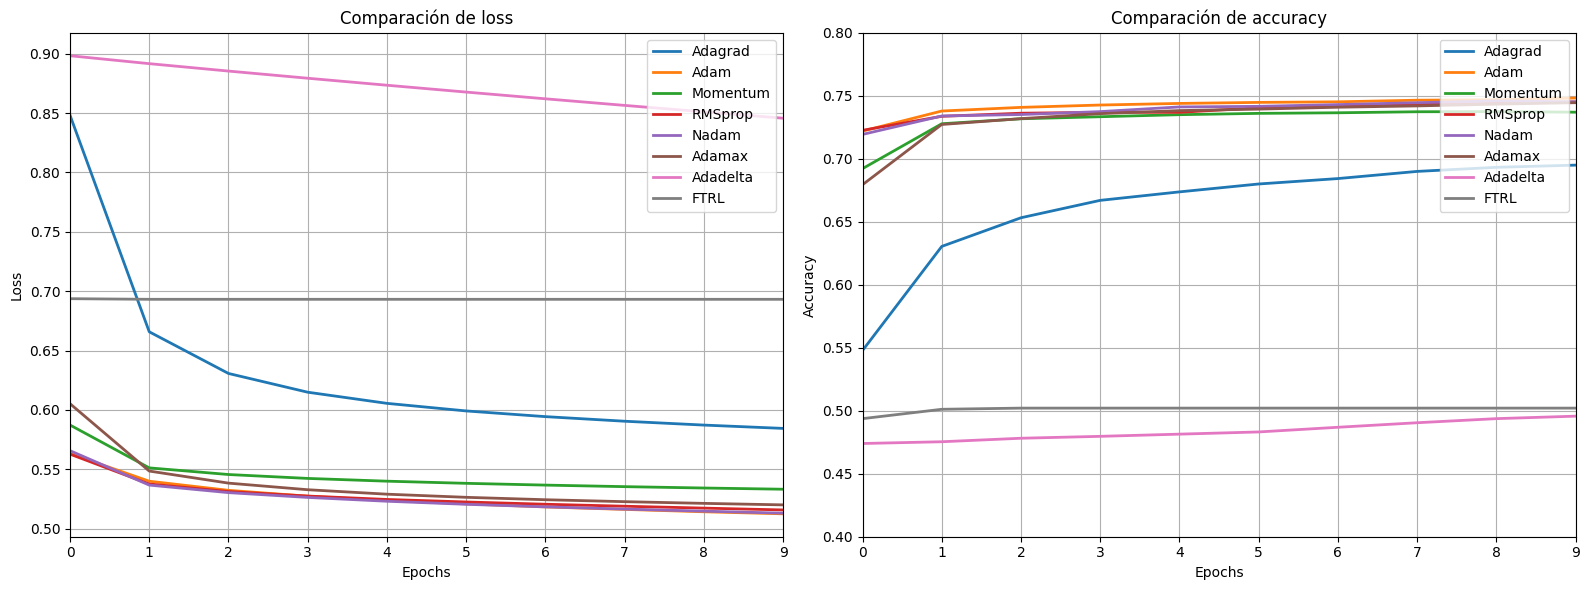

In [21]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
plt.axis([0, 9, 0.4, 0.8])
plt.show()

Iteración sobre función de activación

In [22]:
activaciones = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'ELU': 'elu',
    'SELU': 'selu',
    'Mish': 'mish',
    'Linear': 'linear'
}

Correr el modelo

In [23]:
# Entrenar el modelo y guardar historiales
histories = {}
for name, act in activaciones.items():
    #Para escoger optimizador, mantuvimos relu y 64 neuronas en la primera capa
    histories[name] = build_and_train_model(tf.keras.optimizers.Nadam(learning_rate=0.001),act,64)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6297 - loss: 0.6991 - val_accuracy: 0.7400 - val_loss: 0.5466
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7369 - loss: 0.5362 - val_accuracy: 0.7442 - val_loss: 0.5427
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7408 - loss: 0.5292 - val_accuracy: 0.7447 - val_loss: 0.5413
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7423 - loss: 0.5248 - val_accuracy: 0.7447 - val_loss: 0.5402
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7455 - loss: 0.5216 - val_accuracy: 0.7428 - val_loss: 0.5400
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7468 - loss: 0.5189 - val_accuracy: 0.7391 - val_loss: 0.5395
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7484 - loss: 0.5168 - val_accuracy: 0.7396 - val_loss: 0.5395
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7499 - loss: 0.5149 - val_accuracy: 0.

Graficar resultados

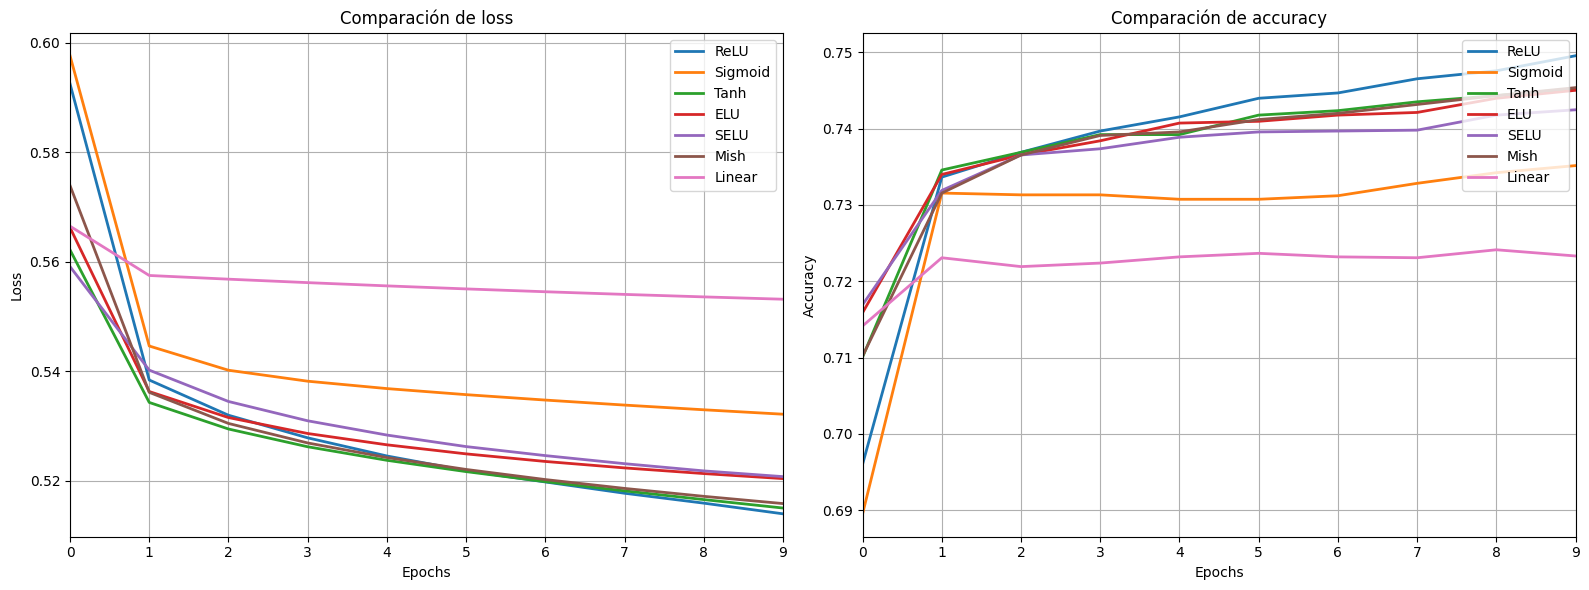

In [24]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
#plt.axis([0, 9, 0.5, 0.8])
plt.show()

Nueva función para probar combinación de las tres mejores funciones

In [25]:
def build_model(activacion1, activacion2, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion1,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion2,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion1, activacion2, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion1, activacion2,  neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

Combinaciones de las tres funciones

In [26]:
import itertools

# Lista de funciones de activación
activaciones = {
    'ReLU': 'relu',
    'Tanh': 'tanh',
    'Mish': 'mish'
}

# Crear todas las combinaciones posibles
combinaciones = list(itertools.product(activaciones.values(), repeat=2))
combinaciones

[('relu', 'relu'),
 ('relu', 'tanh'),
 ('relu', 'mish'),
 ('tanh', 'relu'),
 ('tanh', 'tanh'),
 ('tanh', 'mish'),
 ('mish', 'relu'),
 ('mish', 'tanh'),
 ('mish', 'mish')]

Correr modelo

In [27]:
histories = {}
for activacion1, activacion2 in combinaciones:
    combinacion = f"{activacion1} + {activacion2}"
    histories[combinacion] = build_and_train_model(tf.keras.optimizers.Nadam(learning_rate=0.001),activacion1, activacion2,64)


Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6765 - loss: 0.6104 - val_accuracy: 0.7372 - val_loss: 0.5512
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7374 - loss: 0.5366 - val_accuracy: 0.7414 - val_loss: 0.5451
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7388 - loss: 0.5290 - val_accuracy: 0.7419 - val_loss: 0.5424
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7412 - loss: 0.5247 - val_accuracy: 0.7442 - val_loss: 0.5411
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7453 - loss: 0.5210 - val_accuracy: 0.7470 - val_loss: 0.5408
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7481 - loss: 0.5186 - val_accuracy: 0.7451 - val_loss: 0.5400
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7487 - loss: 0.5166 - val_accuracy: 0.7484 - val_loss: 0.5399
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7489 - loss: 0.5147 - val_accuracy: 0.

Graficar resultados

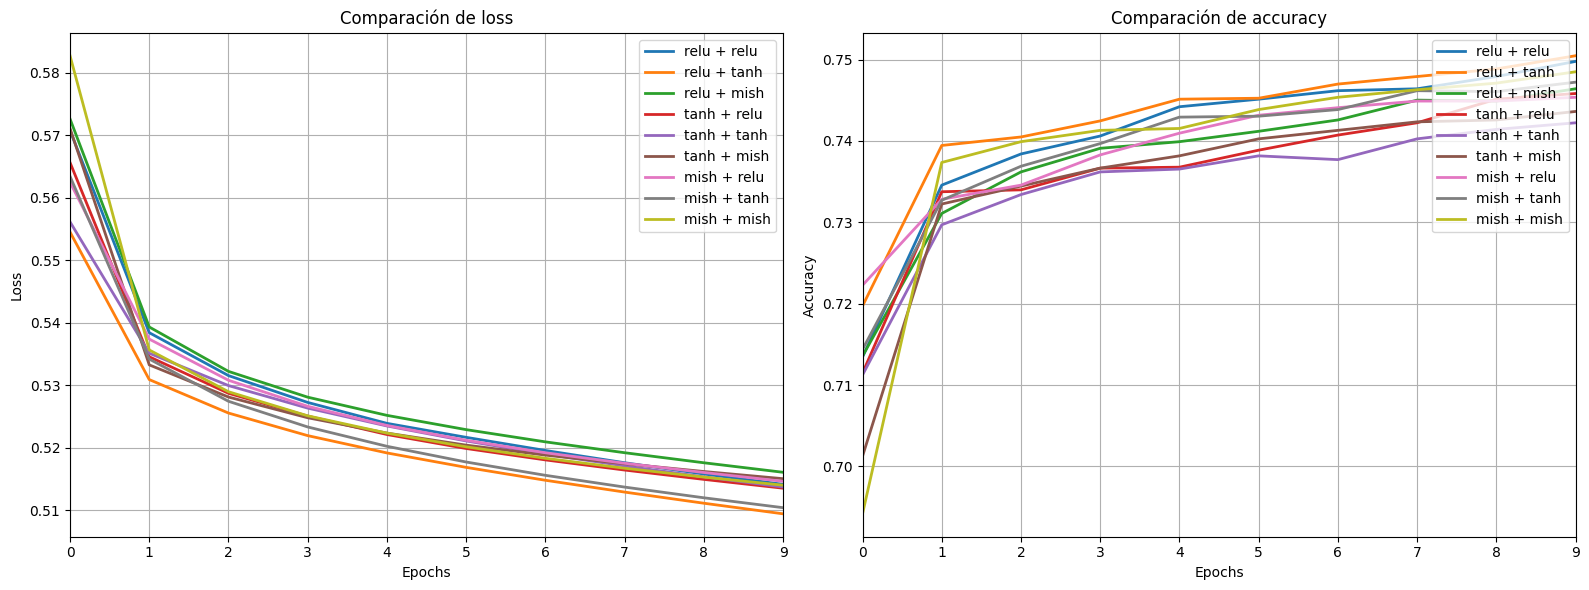

In [28]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for name, history in histories.items():
        ax.plot(history.history[metric], label=f"{name}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparación de {metric}")
    ax.set_xlim(0, len(history.history[metric]) - 1)

plt.tight_layout()
#plt.axis([0, 9, 0.5, 0.8])
plt.show()

Iteración sobre neuronas

In [29]:
#Se vuelve a definir la función porque se escoge solo relu para la activación

def build_model(activacion, neuronas, input_shape):
    tf.random.set_seed(42)
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Dense(neuronas, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(neuronas//2, activation=activacion,
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

def build_and_train_model(optimizer, activacion, neuronas):
    input_shape = (X_train.shape[1],)  # Asignar forma de entrada
    model = build_model(activacion, neuronas, input_shape)
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_test, y_test))

Lista de neuronas

In [30]:
num_neurons_list = [2 ** i for i in range(3, 9)]
num_neurons_list

[8, 16, 32, 64, 128, 256]

In [31]:
histories = {}
for neuronas in num_neurons_list:
    combinacion = f"{neuronas} neuronas"
    histories[combinacion] = build_and_train_model(tf.keras.optimizers.Nadam(learning_rate=0.001),'relu',neuronas)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6394 - loss: 0.6678 - val_accuracy: 0.7094 - val_loss: 0.5877
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7167 - loss: 0.5765 - val_accuracy: 0.7252 - val_loss: 0.5567
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.5504 - val_accuracy: 0.7321 - val_loss: 0.5454
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7321 - loss: 0.5400 - val_accuracy: 0.7335 - val_loss: 0.5414
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.5356 - val_accuracy: 0.7363 - val_loss: 0.5393
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7349 - loss: 0.5332 - val_accuracy: 0.7377 - val_loss: 0.5383
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7362 - loss: 0.5314 - val_accuracy: 0.7386 - val_loss: 0.5374
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7365 - loss: 0.5300 - val_accuracy: 0.

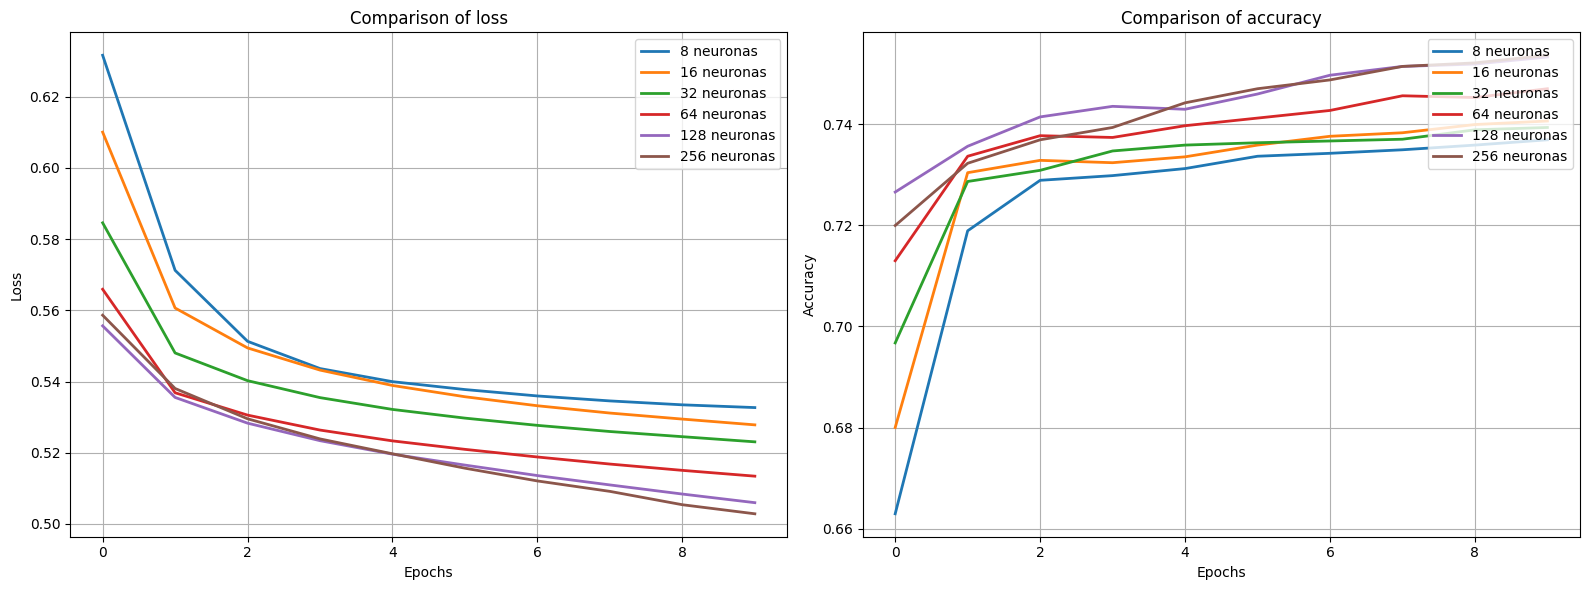

In [32]:
# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Métricas a graficar
metrics = ["loss", "accuracy"]

# Graficar resultados
for i, metric in enumerate(metrics):
    ax = axs[i]
    for combinacion, history in histories.items():
        ax.plot(history.history[metric], label=f"{combinacion}", linewidth=2)
    ax.grid()
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.replace("_", " ").title())
    ax.legend(loc="upper right")
    ax.set_title(f"Comparison of {metric}")
    

plt.tight_layout()
#plt.axis([0, 9, 0.5, 0.8])
plt.show()

Modelo final preliminar

In [33]:
#Corro el modelo final

# Optimizer, activation, and neurons settings
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
activacion = 'relu'
neuronas = 64

# Entrenar el modelo y obtener el historial
history_final = build_and_train_model(optimizer, activacion, neuronas)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6665 - loss: 0.6080 - val_accuracy: 0.7344 - val_loss: 0.5473
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7319 - loss: 0.5352 - val_accuracy: 0.7354 - val_loss: 0.5413
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7396 - loss: 0.5258 - val_accuracy: 0.7386 - val_loss: 0.5383
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7434 - loss: 0.5207 - val_accuracy: 0.7391 - val_loss: 0.5381
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7448 - loss: 0.5175 - val_accuracy: 0.7391 - val_loss: 0.5375
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7450 - loss: 0.5148 - val_accuracy: 0.7382 - val_loss: 0.5379
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7457 - loss: 0.5132 - val_accuracy: 0.7396 - val_loss: 0.5388
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7467 - loss: 0.5115 - val_accuracy: 0.

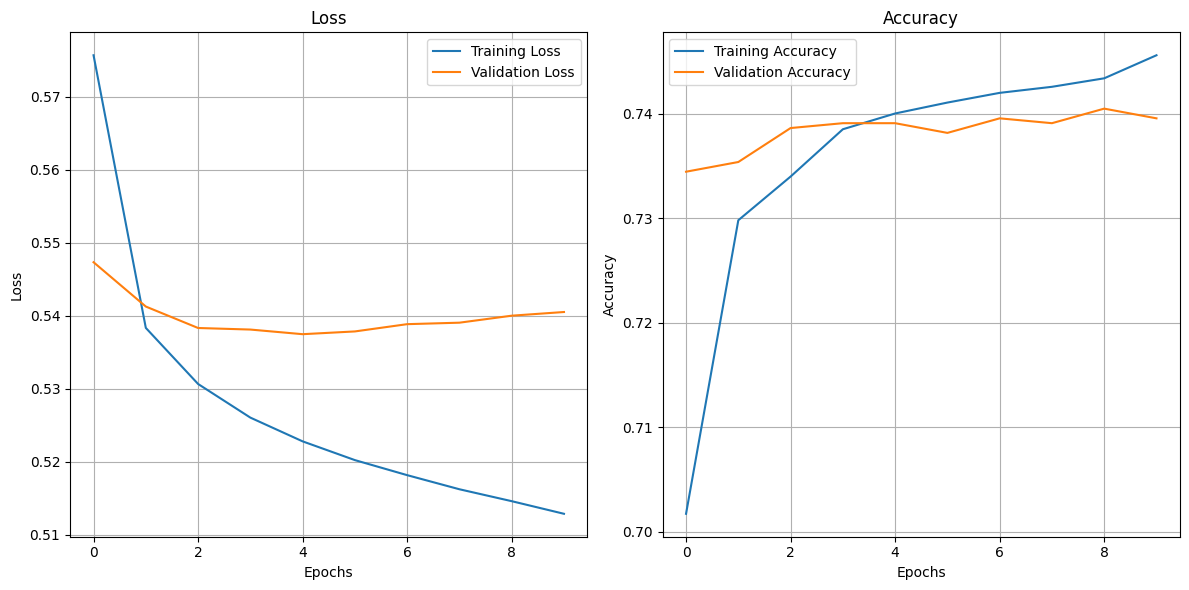

In [34]:
# Graficar los resultados
def plot_results(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Graficar pérdida (loss)
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    # Graficar precisión (accuracy)
    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_results(history_final)

Prueba con otras variables

In [35]:
# Variable de respuesta (última columna)
y = df['Y default payment next month']

# Variables de entrada (solo las columnas especificadas)
columnas_X = ['X1 LIMIT_BAL', 'X2 SEX', 'X3 EDUCATION', 'X6 PAY_0', 'X7 PAY_2', 
              'X8 PAY_3', 'X9 PAY_4', 'X10 PAY_5', 'X11 PAY_6', 'X12 BILL_AMT1', 
              'X13 BILL_AMT2', 'X14 BILL_AMT3', 'X15 BILL_AMT4', 'X16 BILL_AMT5', 'X17 BILL_AMT6']

X = df[columnas_X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir y_train y y_test a números enteros
y_train = pd.to_numeric(y_train, errors='coerce').astype(int)
y_test = pd.to_numeric(y_test, errors='coerce').astype(int)

In [36]:
#Evalúo con esas variables

#Corro el modelo final

# Optimizer, activation, and neurons settings
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
activacion = 'relu'
neuronas = 64

# Entrenar el modelo y obtener el historial
history = build_and_train_model(optimizer, activacion, neuronas)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6821 - loss: 0.6194 - val_accuracy: 0.7279 - val_loss: 0.5410
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7302 - loss: 0.5351 - val_accuracy: 0.7363 - val_loss: 0.5382
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7338 - loss: 0.5279 - val_accuracy: 0.7363 - val_loss: 0.5374
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7364 - loss: 0.5230 - val_accuracy: 0.7335 - val_loss: 0.5370
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.5201 - val_accuracy: 0.7354 - val_loss: 0.5369
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7432 - loss: 0.5176 - val_accuracy: 0.7368 - val_loss: 0.5363
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7446 - loss: 0.5154 - val_accuracy: 0.7349 - val_loss: 0.5363
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7442 - loss: 0.5134 - val_accuracy: 0.

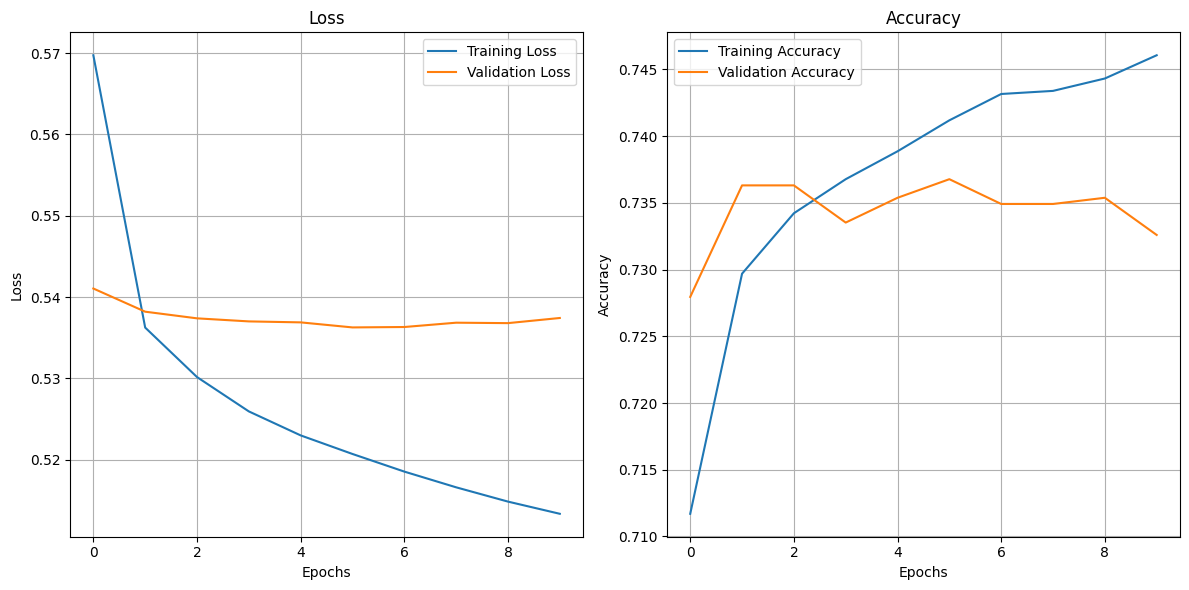

In [37]:
def plot_results(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Graficar pérdida (loss)
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid()

    # Graficar precisión (accuracy)
    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar
plot_results(history)

#Se prefiere el anterior modelo